# Part 1:
For this project, I have selected Five documents including one scientific text, one Screen play, one novel story, one act, and one poem:
1) Self-Organizing Systems: This book is a collection of scientific essays and papers on the topic of self-organizing systems. The book covers various aspects of self-organization, including the mathematical foundations, the principles of organization and adaptation, the applications of self-organizing systems in biology, sociology, and psychology, as well as the implications for technology and engineering. (Genre: Scientific)(Words: 25948)

2) Titanic screenplay: The Titanic screenplay is a script written for the 1997 blockbuster movie "Titanic," directed by James Cameron. The movie is a fictionalized account of the sinking of the RMS Titanic in 1912 and the love story between the two main characters, Jack and Rose. (Genre:  historical fiction, drama, and romance) (words: 43358)

3) Alices Adventures in Wonderland: This book has a series of adventures and encounters various characters, including the Cheshire Cat, the Mad Hatter, and the Queen of Hearts. Throughout her journey, Alice must navigate the nonsensical and unpredictable nature of Wonderland while trying to find her way back home. The book is often considered a classic of children's literature. Its narrative, structure, characters and imagery have had widespread influence on popular culture and literature, especially in the fantasy genre (Genre:A unique blend of fantasy, children's literature, and literary fiction.) (Words:26765)

4) The Prophet: The book is a collection of 26 essays or "prose poems," each dealing with a different aspect of human experience and offering insights into life, love, marriage, work, joy, sorrow, and other topics. The essays are written in the form of conversations between a wise prophet named Almustafa and various people he encounters on his journey. (Genre: A combination of philosophical and spiritual literature, with elements of poetry, essay, and parable)(Words:12494)

5) Romeo and Juliet: This is a tragedy act written by William Shakespeare and is about the romance between two Italian youths from feuding families. (Genre: Tragedy)(Words:25997)



# Part 2: 

I performed the following preprocessing on each text:

1) Lowercased all text to ensure uniformity and avoid duplicates due to capitalization.
2) Removed numbers.
3) Removed special characters
4) Removed extra white space 
5) Removed stopwords
6) Lemmatized words

Then I created the bar char of 25 most frequent words and also word cloud on preprocessed text.


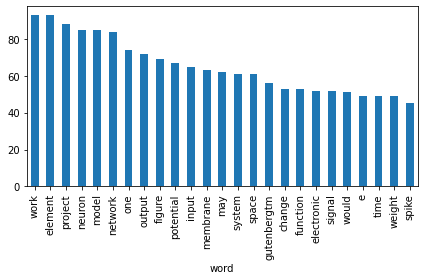

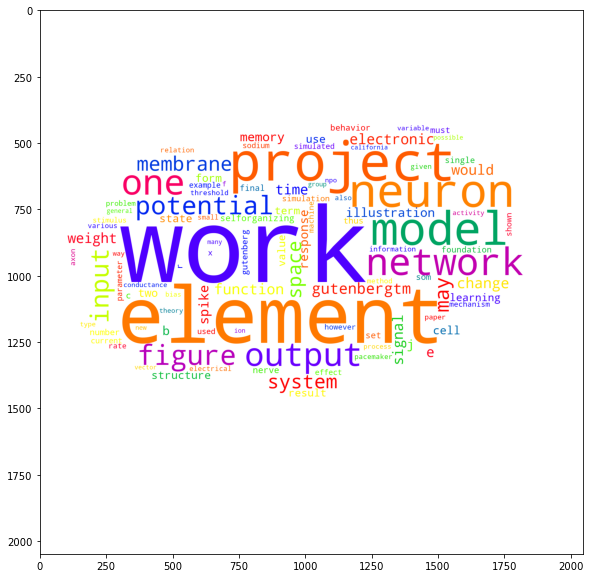

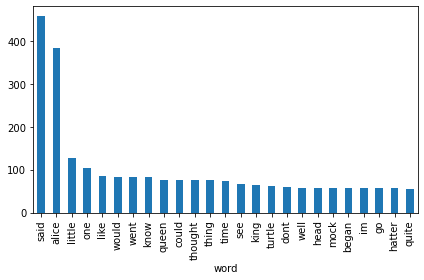

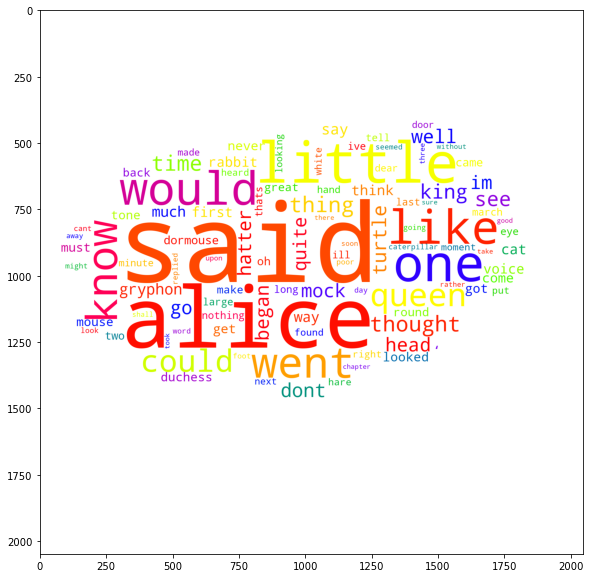

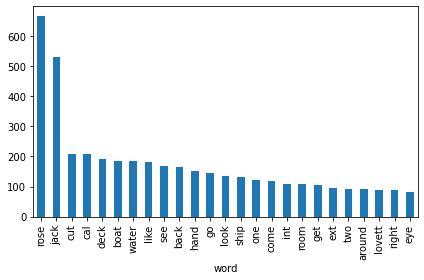

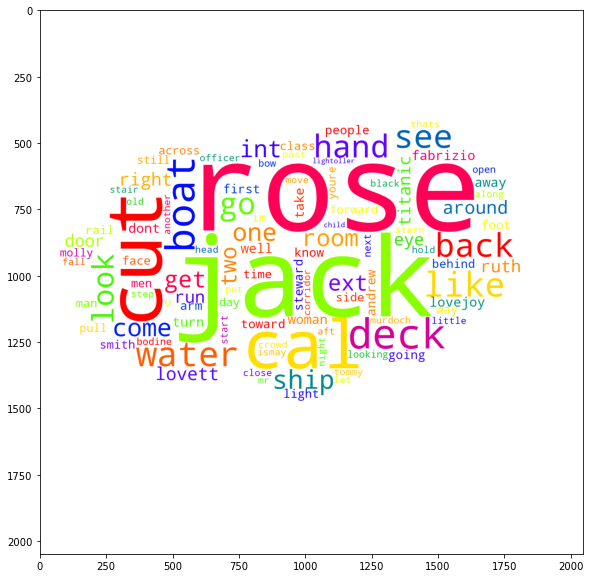

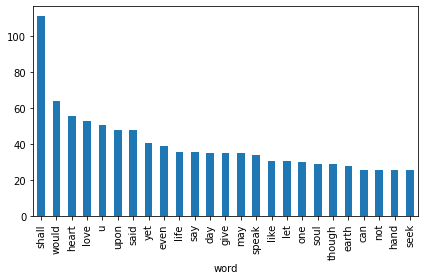

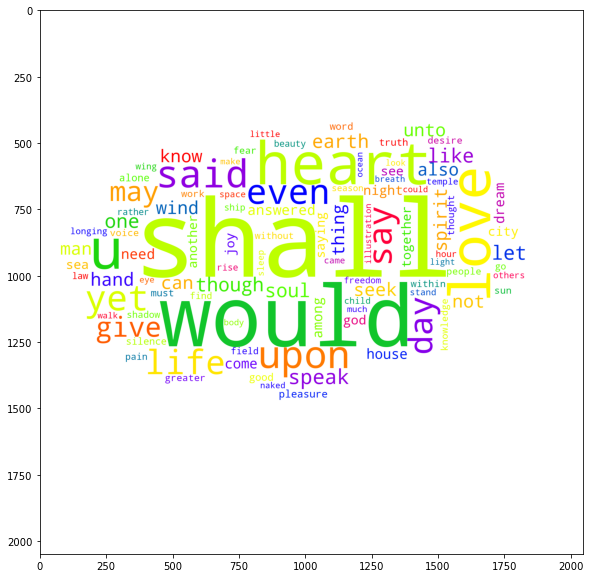

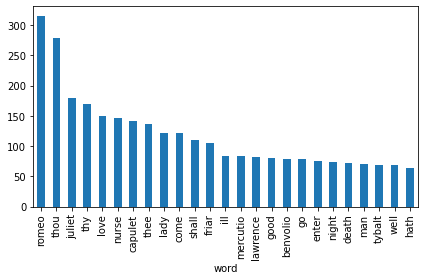

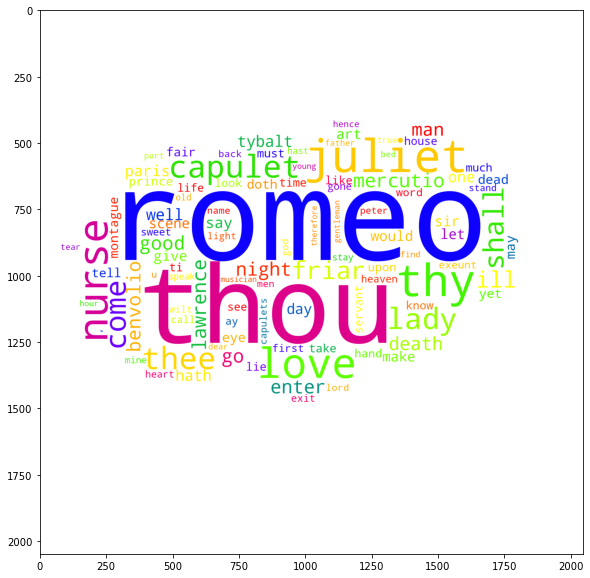

In [1]:
from textblob import TextBlob, Word
from pathlib import Path
from nltk.corpus import stopwords
from operator import itemgetter
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def preprocessing(text):
    """
    1. Lowercase text
    2. Remove numbers
    3. Remove special characters
    4. Remove extra white space
    5. Remove Stopwords
    6. Lemmatize words
    """
    
    
    text = text.lower()
        
    for i in "0123456789":
        text=text.replace(i,'')
        
    for i in "`~!@#$%^&*_+-={}[]()';:/?.,<>|\\?/\'”’“":
        text=text.replace(i,'')
    #print(cleanText) 
    
    #nltk.download('stopwords')
    stwords=stopwords.words('english')
    cleanText=""
    for w in text.split():
        if w.lower() not in stwords: 
            cleanText=cleanText+ Word(w).lemmatize()+' '
    return cleanText
    
    


def computewordcount(script):
    text=Path(script).read_text("UTF-8")
    
    blob = TextBlob(preprocessing(text))
        
    items = blob.word_counts.items()
    sorted_items = sorted(items, key=itemgetter(1), reverse=True)
    
    top25 = sorted_items[:25]
    df = pd.DataFrame(top25, columns=['word', 'count']) 
    
    df.plot.bar(x='word', y='count', legend=False)
    plt.gcf().tight_layout()
    
   
    mask_image = imageio.imread('mask.png')
      
    wc = WordCloud(width=1000, height=1000,colormap='prism', mask=mask_image, background_color='white')
    
    top100words = dict(sorted(items, key = itemgetter(1), reverse = True)[:100])

    wc= wc.fit_words(top100words)
    wc = wc.to_file(script.replace('.txt','.png'))
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    
    return df

script=['SelfOrganizingSystems.txt','AlicesAdventuresInWonderland.txt','TitanicScreenplay.txt','TheProphet.txt','RomeoandJuliet.txt']

for file in script:
    df=computewordcount(file)



# Part 3:

this part is performed only on three first text including: Self-Organizing Systems, Alices Adventures In Wonderland, and Titanic

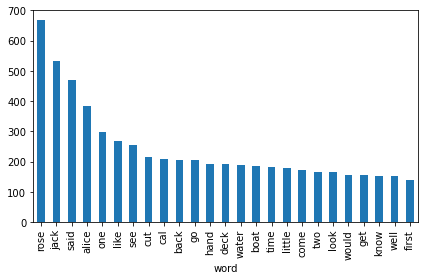

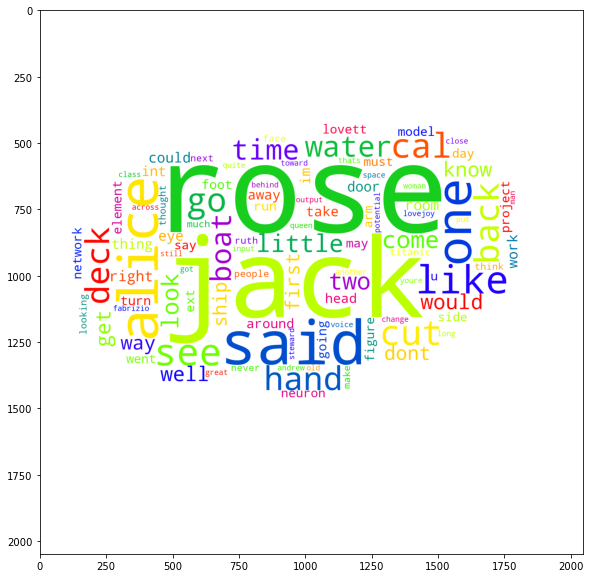

In [2]:
combined_content = ""
for i in range(3):
    with open(script[i],encoding='utf-8') as reader:  
        combined_content += reader.read()

# Write the combined content to a new file
with open('allScripts.txt', 'w',encoding='utf-8') as combined_file:
    combined_file.write(combined_content)

top25_df=computewordcount('allScripts.txt')
top25_df.at['TotalCount', "count"] = top25_df["count"].sum()
top25_df.to_csv('MCW.csv',mode='w+',sep=',')

# Part 4:
According to the readability scores, Self-Organizing Systems appears to be the most readable, while Titanic and Romeo and Juliet have the lowest scores. This outcome is not surprising since scientific texts often use simpler sentences and vocabulary, making them easier to comprehend. Conversely, literary works like plays and novels can be more challenging to read due to their complex language and structures. 

In [3]:
from textatistic import Textatistic

for file in script:
    text = Path(file).read_text("UTF-8")
    readability = Textatistic(text)
    avg_readability=(readability.fleschkincaid_score +readability.gunningfog_score+ readability.smog_score +readability.dalechall_score)/4
    print(f'average readability score of {file} is {avg_readability}')

average readability score of SelfOrganizingSystems.txt is 11.147263372140747
average readability score of AlicesAdventuresInWonderland.txt is 6.538620124965802
average readability score of TitanicScreenplay.txt is 4.750693728731936
average readability score of TheProphet.txt is 6.770189805487278
average readability score of RomeoandJuliet.txt is 4.770510957195711


# Part 5:

all similarity scores seems high to me. For example, Alice adventure in wonderland which is  a children's book in the genre of fantcy and Romeo and Juliet which is a tragedy book with more literary and poetic words has 0.975 similarity!

However, it is notable that the Self-Organizing Systems book has the lowest similarity scores with the other books, particularly Romeo and Juliet, which is to be expected given its distinct subject matter and technical language.

In terms of the highest similarity score, it is interesting that Alice's Adventures in Wonderland and Titanic screenplay have a score of 0.979, indicating that they share some common elements or themes despite being from different genres. Although I expected the highest similarity to be between The Prophet and Romeo and Juliet because of their similarities in terms of language, style (0.975), their scores are not very far from each other. and we should keep in mind that the quantitative measures do not always align with our expectations.

In [4]:
import spacy
from pathlib import Path
nlp_lg = spacy.load('en_core_web_lg')

document=[]

for file in script:
    document.append(nlp_lg(Path(file).read_text("UTF-8")))


for i in range (4):
    for j in range (i+1,5):
        if i != j:
            print(f'{script[i]} to {script[j]} similarity is {document[i].similarity(document[j]):.3}.')



SelfOrganizingSystems.txt to AlicesAdventuresInWonderland.txt similarity is 0.912.
SelfOrganizingSystems.txt to TitanicScreenplay.txt similarity is 0.92.
SelfOrganizingSystems.txt to TheProphet.txt similarity is 0.938.
SelfOrganizingSystems.txt to RomeoandJuliet.txt similarity is 0.897.
AlicesAdventuresInWonderland.txt to TitanicScreenplay.txt similarity is 0.979.
AlicesAdventuresInWonderland.txt to TheProphet.txt similarity is 0.976.
AlicesAdventuresInWonderland.txt to RomeoandJuliet.txt similarity is 0.975.
TitanicScreenplay.txt to TheProphet.txt similarity is 0.975.
TitanicScreenplay.txt to RomeoandJuliet.txt similarity is 0.97.
TheProphet.txt to RomeoandJuliet.txt similarity is 0.975.
